In [1]:
## get 'cities' into notebook
with open('Downloads/algo2_tsp.txt') as f:
    coords = f.readlines()
    

In [2]:
numCities = coords[0]
numCities

'25\n'

In [3]:
n = 25
coords[1]

'20833.3333 17100.0000\n'

In [5]:
coords = [(float(c[0]), float(c[1])) for c in [line.strip('\n').split() for line in coords[1:]]]

In [6]:
len(coords)

25

In [7]:
coords

[(20833.3333, 17100.0),
 (20900.0, 17066.6667),
 (21300.0, 13016.6667),
 (21600.0, 14150.0),
 (21600.0, 14966.6667),
 (21600.0, 16500.0),
 (22183.3333, 13133.3333),
 (22583.3333, 14300.0),
 (22683.3333, 12716.6667),
 (23616.6667, 15866.6667),
 (23700.0, 15933.3333),
 (23883.3333, 14533.3333),
 (24166.6667, 13250.0),
 (25149.1667, 12365.8333),
 (26133.3333, 14500.0),
 (26150.0, 10550.0),
 (26283.3333, 12766.6667),
 (26433.3333, 13433.3333),
 (26550.0, 13850.0),
 (26733.3333, 11683.3333),
 (27026.1111, 13051.9444),
 (27096.1111, 13415.8333),
 (27153.6111, 13203.3333),
 (27166.6667, 9833.3333),
 (27233.3333, 10450.0)]

In [8]:
coords = [(a-20000, b-10000) for (a,b) in coords]   ## maybe bringing coords closer to 0 speeds up distance computations

In [9]:
coords

[(833.3332999999984, 7100.0),
 (900.0, 7066.666700000002),
 (1300.0, 3016.6666999999998),
 (1600.0, 4150.0),
 (1600.0, 4966.6667),
 (1600.0, 6500.0),
 (2183.3332999999984, 3133.3333000000002),
 (2583.3332999999984, 4300.0),
 (2683.3332999999984, 2716.6666999999998),
 (3616.6667000000016, 5866.6667),
 (3700.0, 5933.3333),
 (3883.3332999999984, 4533.3333),
 (4166.666700000002, 3250.0),
 (5149.166700000002, 2365.8333000000002),
 (6133.333299999998, 4500.0),
 (6150.0, 550.0),
 (6283.333299999998, 2766.6666999999998),
 (6433.333299999998, 3433.3333000000002),
 (6550.0, 3850.0),
 (6733.333299999998, 1683.3333000000002),
 (7026.111099999998, 3051.9444000000003),
 (7096.111099999998, 3415.8333000000002),
 (7153.611099999998, 3203.3333000000002),
 (7166.666700000002, -166.66669999999976),
 (7233.333299999998, 450.0)]

In [16]:
import matplotlib.pyplot as plt

In [107]:
for i in range(len(coords)):
    plt.scatter(coords[i][0], coords[i][1])
    plt.text(coords[i][0] * (1 + 0.01), coords[i][1] * (1 + 0.01) , i, fontsize=12)
    ## annotation came from this:  https://stackoverflow.com/questions/44998205/labeling-points-in-matplotlib-scatterplot

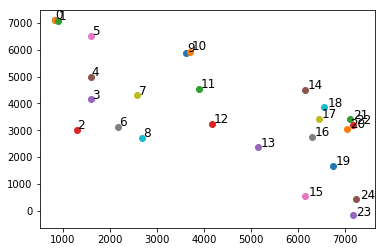

In [108]:
plt.show()

### First try dynamic programming without using knowledge of above graph

In [21]:
import math

In [24]:
## maybe try just a lookup table for the euclidean distances, to speed up calcs during algo
dist = [[math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2) for p2 in coords] for p1 in coords]

In [25]:
dist[0][1]

74.53561415712697

In [27]:
dist[1][0]

74.53561415712697

In [34]:
import itertools

In [40]:
list(itertools.combinations(range(1,6), 3))

[(1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

In [46]:
## utility to remove an element from a tuple
def extract(tup, e):
    return tuple([x for x in tup if x != e])

In [47]:
extract((2,4,6,8), 6)

(2, 4, 8)

In [57]:
## utility to add an element to a tuple
def prepend(tup, e):
    return tuple([e] + [t for t in tup])

In [58]:
prepend((2,4), 0)

(0, 2, 4)

In [89]:
subsets = {(0,):[0]}  ## initiate the lookup dict with p0 being reachable from itself with distance 0
for p2 in range(1, len(coords)):
    subsets[(0,)].append(float('inf'))   

for m in range(2, len(coords)):
    combos = itertools.combinations(range(1, len(coords)), m-1)
    for s in combos:
        t = prepend(s, 0)
        mins = [float('inf') for _ in range(len(coords))]  ## build the list of dists to each j within the set in the current iteration
        for j in s:
            u = extract(t, j)
            mins[j] = min(subsets[u][k] + dist[k][j] for k in u)
        subsets[t] = mins

In [96]:
subsets[tuple(range(1,25))]

KeyError: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24)

In [94]:
subsets[tuple([0] + list(range(2,25)))]

[inf,
 inf,
 23892.456726728105,
 24441.46771663101,
 24174.204687408073,
 25467.577601417266,
 24657.09230434453,
 23996.16319960178,
 24216.778133486452,
 23593.76040975763,
 23541.546061097604,
 24115.40172658218,
 24080.303364680763,
 24075.223224051348,
 23066.690477917018,
 23020.392965316732,
 23890.86249162733,
 23776.70733374451,
 23742.049978633655,
 24105.059206189406,
 23664.363389663904,
 23895.984342841908,
 23814.78195397056,
 22808.272857716245,
 22964.207886470187]

In [97]:
lastKey = tuple(range(len(coords)))  ## Guess I needed one more iteration.  Takes too long to re-run above, so adding here.

In [99]:
mins = [float('inf') for _ in range(len(coords))]  ## build the list of dists to each j within the set in the current iteration
for j in range(1,len(coords)):
    u = extract(lastKey, j)
    mins[j] = min(subsets[u][k] + dist[k][j] for k in u)
subsets[lastKey] = mins

In [100]:
subsets[lastKey]

[inf,
 26368.19469479763,
 23894.07061691474,
 24443.081606817646,
 24175.81857759471,
 25488.79584633222,
 24658.706194531165,
 23997.777089788415,
 24218.39202367309,
 23595.374299944273,
 23543.159951284248,
 24117.015616768822,
 24081.9172548674,
 24076.83711423799,
 23068.304368103654,
 23022.006855503376,
 23892.476381813965,
 23778.321223931147,
 23743.66386882029,
 24106.67309637605,
 23665.97727985054,
 23897.598233028544,
 23816.395844157196,
 22809.886747902885,
 22965.821776656827]

In [101]:
results = [subsets[lastKey][i] + dist[0][i] for i in range(len(coords))]

In [115]:
results

[inf,
 26442.730308954757,
 28003.984076803863,
 27491.077313653353,
 26442.73030895475,
 26462.334663683072,
 28848.806993902093,
 27299.670486008225,
 28976.134221279943,
 26639.722480498604,
 26638.138005774745,
 28103.276765876955,
 29174.422684963236,
 30482.986681641523,
 28971.69322536183,
 31458.205335795843,
 30855.25438264732,
 30471.933454176404,
 30319.58799846845,
 32116.05997296585,
 31064.440026993638,
 31163.64736894565,
 31241.348560509112,
 32449.158343020667,
 32195.258379180297]

In [103]:
min(results)  ## hopefully shortest path

26442.73030895475

## OK that worked but took like 75 minutes

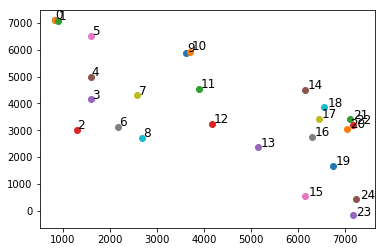

In [108]:
plt.show()

How about eyeballing a set of possible candidates for each subproblem

In [122]:
nearby = {0:[1,2,3,4], 1:[2,3,4,5], 2:[3,4,5,6,7], 3:[4,6,7,9], 4:[5,6,7,8,9,10], 5:[6,7,9,10],
         6:[7,8], 7:[8,9,10,11], 8:[9,10,11,12,15], 9:[10,11], 10:[11,13,14], 11:[12,13,14],
         12:[13,14,15,16,17,18], 13:[14,15,17,18,19], 14:[16,17,18], 15:[16,19,23,24],
         16:[17,18,19,20,21,22], 17:[18,19,20,21,22], 18:[20,21,22], 19:[20,22,23,24], 20:[21,22,24],
         21:[22], 22:[23,24], 23:[24], 24:[]}

In [120]:
## Above has lists of values greater than keys, but if you need those less as well:
for k in range(23,-1,-1):
    for v in nearby[k]:
        nearby[v] = [k] + nearby[v]

In [123]:
nearby
    
    

{0: [1, 2, 3, 4],
 1: [2, 3, 4, 5],
 2: [3, 4, 5, 6, 7],
 3: [4, 6, 7, 9],
 4: [5, 6, 7, 8, 9, 10],
 5: [6, 7, 9, 10],
 6: [7, 8],
 7: [8, 9, 10, 11],
 8: [9, 10, 11, 12, 15],
 9: [10, 11],
 10: [11, 13, 14],
 11: [12, 13, 14],
 12: [13, 14, 15, 16, 17, 18],
 13: [14, 15, 17, 18, 19],
 14: [16, 17, 18],
 15: [16, 19, 23, 24],
 16: [17, 18, 19, 20, 21, 22],
 17: [18, 19, 20, 21, 22],
 18: [20, 21, 22],
 19: [20, 22, 23, 24],
 20: [21, 22, 24],
 21: [22],
 22: [23, 24],
 23: [24],
 24: []}

In [124]:
def expand(oldPaths, nearDict):
    """
    Instead of using every possible combination of cities for each new value of m,
    this method will only expand m in sensible directions
    """
    newPaths = set()
    for path in oldPaths:
        for city in nearDict[path[-1]]:
            newPaths.add(tuple([c for c in path] + [city]))
    return newPaths
        

In [141]:
e = expand({(0,)}, nearby)

In [142]:
e

{(0, 1), (0, 2), (0, 3), (0, 4)}

In [128]:
e = expand(e, nearby)

In [ ]:
oldsets = {(0,):[0]}  ## initiate the lookup dict with p0 being reachable from itself with distance 0
for p2 in range(1, len(coords)):
    oldsets[(0,)].append(float('inf'))   

In [ ]:
for _ in range(1, len(coords)):
    newkeys = expand(oldsets.keys(), nearby)
    newsets = dict()
    for s in newkeys:
        mins = [float('inf') for _ in range(len(coords))]  ## build the list of dists to each j within the set in the current iteration
        for j in extract(s,0):
            u = extract(s, j)
            if u in oldsets:
                mins[j] = min(oldsets[u][k] + dist[k][j] for k in u)
        newsets[s] = mins
    oldsets = newsets

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/message.c:4294)
KeyboardInterrupt


In [ ]:
len(oldsets)

## Need to figure that eyeballing method out.  